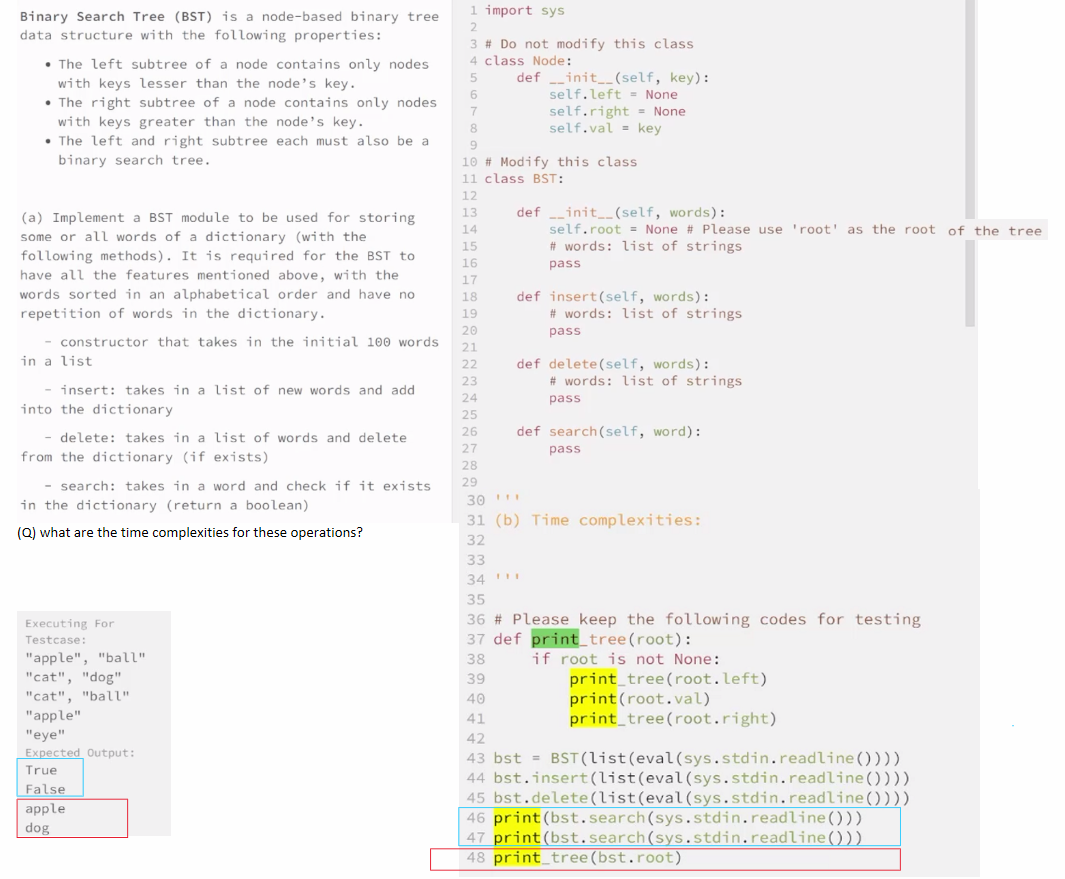

In [ ]:
import sys

# Do not modify this class
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

# Modify this class
class BST:
    def __init__(self, words):
        self.root = None  # Please use 'root' as the root of the tree
        # words: list of strings
        pass

    def insert(self, words):
        # words: list of strings
        pass

    def delete(self, words):
        # words: list of strings
        pass

    def search(self, word):
        pass

'''
(b) Time complexities:

'''

# Please keep the following codes for testing
def print_tree(root):
    if root is not None:
        print_tree(root.left)
        print(root.val)
        print_tree(root.right)

bst = BST(list(eval(sys.stdin.readline())))
bst.insert(list(eval(sys.stdin.readline())))
bst.delete(list(eval(sys.stdin.readline())))
print(bst.search(sys.stdin.readline()))
print_tree(bst.root)


# Jupyter notebook

In [52]:
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key
        
# Function to print tree in order - for testing purposes
def print_tree(node):
    if node is not None:
        print_tree(node.left)
        print(node.val)
        print_tree(node.right)

class BST:
    def __init__(self, words):
        self.root = None
        for word in words:
            self.insert(word)

    def insert(self, word):
        if self.root is None:
            self.root = Node(word) ### Node
        else:
            self._insert(self.root, word)

    def _insert(self, node, word):
        if word < node.val:
            if node.left is None:
                node.left = Node(word) ### Node
            else:
                self._insert(node.left, word)
        else:
            if node.right is None:
                node.right = Node(word) ### Node
            else:
                self._insert(node.right, word)

    def delete(self, word):
        self.root = self._delete(self.root, word)

    def _delete(self, node, word):
        if node is None:
            return node
        if word < node.val:
            node.left = self._delete(node.left, word)
        elif word > node.val:
            node.right = self._delete(node.right, word)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            temp_val = self._min_value_node(node.right).val
            node.val = temp_val
            node.right = self._delete(node.right, temp_val)
        return node

    def _min_value_node(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current

    def search(self, word):
        return self._search(self.root, word)

    def _search(self, node, word):
        if node is None:
            return False
        if node.val == word:
            return True
        elif word < node.val:
            return self._search(node.left, word)
        else:
            return self._search(node.right, word)


bst = BST(["apple", "ball"])
bst.insert("cat")
bst.insert("dog")
bst.delete("cat")
bst.delete("ball")
print(bst.search("apple"))
print(bst.search("eye"))
print_tree(bst.root)



True
False
apple
dog


# With comments

In [ ]:

def print_tree(node):
    if node is not None:
        print_tree(node.left)
        print(node.val)
        print_tree(node.right)
#     1
#    / \
#   2   3
#  / \
# 3   6
# this will print out 3,2,6,1,3
        
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key
        
class BST:
    def __init__(self, words):
        self.root = None
        for word in words:
            self.insert(word)
            
    def insert(self, word): # if word already exist in tree, nothing happen
        if self.root is None:
            self.root = Node(word) ### Node
        else:
            self._insert(self.root, word)
            
##### before
#         100
#       /     \
#     50         150
#  /     \ 
# 40       75
##### insert: 80
##### after
#     100
#    /   \
#   50   150
#  / \
# 40  75
#       \
#       80

            
    def _insert(self, node, word):
        if word < node.val:
            if node.left is None:
                node.left = Node(word) ### Node
            else:
                self._insert(node.left, word)
        else:
            if node.right is None:
                node.right = Node(word) ### Node
            else:
                self._insert(node.right, word)
                
    def delete(self, word): # delete a word, remaining words are rearranged to preserve the same order
                            # delete a word, if word not inside, nothing happen
        self.root = self._delete(self.root, word)
        
    def _delete(self, node, word):
        if node is None: return node
        if word < node.val: node.left = self._delete(node.left, word)
        elif word > node.val:
            node.right = self._delete(node.right, word)
        else: # found the word in the tree
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            
            temp_val = self._min_value_node(node.right).val # in-order successor
            
            # when you delete a node from a BST, if the node has two children, you typically replace it with its 
            # (1) in-order successor (the smallest value thats bigger than the deleted val, e.g. the smallest node in its right subtree) 
            # or (2) its in-order predecessor (the biggest value thats smaller than the deleted val, e.g. the largest node in its left subtree). 
            # For both predecessor and successor mthod, the deleted val will be replaced by 1 node, and this is the only replacement done, other nodes will not be affected
            # Both retain the BST property. The code snippet you provided uses the in-order successor
            
            node.val = temp_val
            node.right = self._delete(node.right, temp_val)
        return node
    
    def _min_value_node(self, node): # in-order successor
        current = node
        while current.left is not None:
            current = current.left
        return current
    
    def search(self, word):
        return self._search(self.root, word)
    
    def _search(self, node, word):
        if node is None:
            return False
        if node.val == word:
            return True
        elif word < node.val:
            return self._search(node.left, word)
        else:
            return self._search(node.right, word)
            
    
bst = BST(["apple", "ball"])
bst.insert("cat")
bst.insert("dog")
bst.delete("cat")
bst.delete("ball")
print(bst.search("apple"))
print(bst.search("eye"))
print_tree(bst.root)

# Attempt 2

In [ ]:
class Node: # create a new leaf node
    def __init__(self, word):
        self.left = None
        self.right = None
        self.val = word

def print_tree(node): # prints from leftmost of tree to rightmost of tree
    if node is not None:
        print_tree(node.left)
        print(node.val)
        print_tree(node.right)
#     1
#    / \
#   2   3
#  / \
# 3   6
# this will print out 3,2,6,1,3
        

class BST:
    def __init__(self, words):
        self.root = None
        for word in words:
            self.insert(word)
        
    def insert(self, word):
        if self.root is None:
            self.root = Node(word) ### Node
        else:
            self._insert(self.root, word)
            
    def _insert(self, node, word):
        if node is None:
            return Node(word) ### Node
        elif word < node.val:
            node.left = self._insert(node.left, word)
        elif word > node.val:
            node.right = self._insert(node.right, word)
        else: #word == node.val. 
            return None
        
    def delete(self, word):
        if self.root is None:
            return None
        else:
            self._delete(self.root, word)
            
    def _delete(self, node, word):
        if node is None:
            return None
        elif word < node.val:
            node.left = self._delete(node.left, word)
        elif word > node.val:
            node.right = self._delete(node.right, word)
        else: # word == node.val
            replaced_val = self._inOrder_successor(node.right).val
            node.val = replaced_val
            node.right = self._delete(node.right, replaced_val)
        return node
            
    def _inOrder_successor(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current

    def search(self, word):
        return self._search(self.root, word)
        
    def _search(self, node, word):
        if node is None:
            return False
        elif word == node.val:
            return True
        if word < node.val:
            return self._search(node.left, word)
        elif word > node.val:
            return self._search(node.right, word)
    
bst = BST(["apple", "ball"])
bst.insert("cat")
bst.insert("dog")
bst.delete("cat")
bst.delete("ball")
print(bst.search("apple"))
print(bst.search("eye"))
print_tree(bst.root)


# How to run a .py file containing .readline() in cmd?
- Create my_script.py and input.txt
- Open cmd, set cd to the folder containing the above 2 files
    - cd C:\path
- Run in cmd
    - python my_script.py < input.txt

    

# .py

In [ ]:
# .py

import sys

class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

class BST:
    def __init__(self, words):
        self.root = None
        for word in words:
            self.insert(word)

    def insert(self, word):
        if self.root is None:
            self.root = Node(word)
        else:
            self._insert(self.root, word)

    def _insert(self, node, word):
        if word < node.val:
            if node.left is None:
                node.left = Node(word)
            else:
                self._insert(node.left, word)
        else:
            if node.right is None:
                node.right = Node(word)
            else:
                self._insert(node.right, word)

    def delete(self, word):
        self.root = self._delete(self.root, word)

    def _delete(self, node, word):
        if node is None:
            return node
        if word < node.val:
            node.left = self._delete(node.left, word)
        elif word > node.val:
            node.right = self._delete(node.right, word)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            temp_val = self._min_value_node(node.right).val
            node.val = temp_val
            node.right = self._delete(node.right, temp_val)
        return node

    def _min_value_node(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current

    def search(self, word):
        return self._search(self.root, word)

    def _search(self, node, word):
        if node is None:
            return False
        if node.val == word:
            return True
        elif word < node.val:
            return self._search(node.left, word)
        else:
            return self._search(node.right, word)

# Function to print tree in order - for testing purposes
def print_tree(node):
    if node is not None:
        print_tree(node.left)
        print(node.val)
        print_tree(node.right)

# Read the initial list of words, and words to insert and delete from stdin
initial_words = list(eval(sys.stdin.readline()))
words_to_insert = list(eval(sys.stdin.readline()))
words_to_delete = list(eval(sys.stdin.readline()))
search_word = sys.stdin.readline().strip()

# Create the BST and perform insertions and deletions
bst = BST(initial_words)
for word in words_to_insert:
    bst.insert(word)
for word in words_to_delete:
    bst.delete(word)

# Search for a word and print the result
print(bst.search(search_word))
print_tree(bst.root)


# input.txt

["apple", "ball"]
["cat", "dog"]
["cat", "ball"]
"apple"
"eye"